In [1]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib as mpl
#mpl.use('AGG')  #无弹窗画图
%matplotlib ipympl
import matplotlib.pyplot as plt
import sys
import copy
import time

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
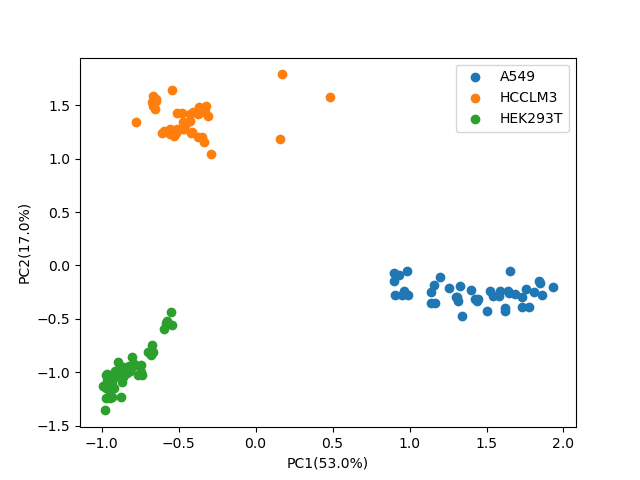

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
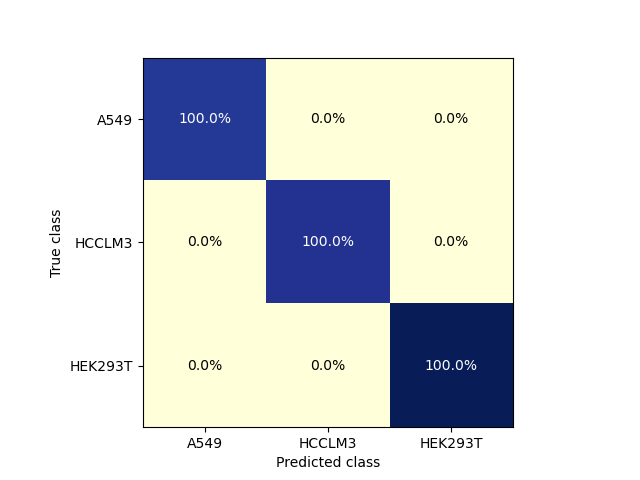

In [14]:
def draw_figures(data_path,sheet_name):
    csv_path=data_path
    data=pd.read_excel(csv_path,sheet_name=sheet_name)
    #print(data.head() )
    labels=list(data['class'].unique())
    mark=['#1f77b4','#ff7f0e','#2ca02c','#d62728','#9467bd','#8c564b','#e377c2','#7f7f7f','#bcbd22','#17bdcf']
    #print(labels)
    plot_handle=[x for x in range(len(labels))]
    #print(plot_handle)

    data_id=data['id']
    data_class=data['class']
    data_value=data.iloc[:,3:]

    data_value=data_value.loc[:,data_value.sum()>0]  #去除全为零的列
    data_value=data_value.apply(lambda x: x/(x.max()),axis=0)  #转换为相对强度
    data_value=data_value.loc[:,(data_value>0).sum()>len(data_value)/len(labels)/2]# 去除噪点
    data_value=data_value.apply(lambda x: (x-x.min())/(x.max()-x.min()+1) )  #归一化
    pca=PCA(n_components=10,whiten=True)
    pca.fit(data_value.values)
    out=pca.transform( data_value.values )
    fig=plt.figure()
    ax=fig.add_subplot()
    ax.set_xlabel('PC1')
    ax.set_ylabel('PC2')

    for i in range(len(data_id)):
         plot_handle[ int(labels.index( data_class[i] ) )] =ax.scatter(out[i][0],out[i][1] ,c=mark[int(labels.index( data_class[i] ) )])#
    ax.legend(plot_handle,labels,loc=0) 
    ax.set_xlabel(f'PC1({100*round(pca.explained_variance_ratio_[0],2)}%)')
    ax.set_ylabel(f'PC2({100*round(pca.explained_variance_ratio_[1],2)}%)')
    #plt.show()
    fig.savefig('PCA_output.png')
    
    from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
    from sklearn.metrics import confusion_matrix
    lda = LDA()
    x=out[:,0:10]
    #x=data_value
    y=[int(labels.index( x ) ) for x in data_class]
    y=data_class.to_list()
    lda.fit(x,y)
    y_predict=lda.predict(x)
    #print(y,y_predict)

    def draw_CM(true_y,pred_y,labels):
        C = confusion_matrix(y, y_predict,labels=labels )#labels=labels
        #print(C,type(C))
        #plt.matshow(C, cmap=plt.cm.YlGnBu)
        fig=plt.figure()#figsize=(3,4),dpi=100
        ax1=fig.add_subplot()
        ax1.imshow(C,cmap=plt.cm.YlGnBu)

        for i in range(len(C)):
            for j in range(len(C)):
                a_val=round(C[j, i]/np.sum(C[i,:]),4)
                ax1.annotate(f'{a_val*100}%', xy=(i, j), horizontalalignment='center', verticalalignment='center',color= (0,0,0) if a_val<=0.5 else (1,1,1))

        ax1.set_ylabel('True class')
        ax1.set_xlabel('Predicted class')
        ax1.set(xticks=range(len(labels)),xticklabels =labels)
        ax1.set(yticks=range(len(labels)),yticklabels =labels)
        #plt.show()
        fig.savefig('CM_output.png')

    draw_CM(y,y_predict,labels)
draw_figures(r'./for_pic.xlsx','Sheet3')